In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Chemin vers le fichier CSV
csv_file_path = "/home/onyxia/work/data/Data_uncleaned.csv"  # Remplacez par le chemin réel de votre fichier

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv(csv_file_path)



# Supposons que la colonne contenant les résultats s'appelle "Resultat"
# Compter les occurrences des différents résultats
results_count = df["Result"].value_counts()

# Afficher les résultats dans la console
print("\nRépartition des résultats :")
print(results_count)

# Préparer les données pour le graphique
labels = results_count.index  # Les types de résultats (1-0, 0-1, 1/2-1/2)
values = results_count.values  # Le nombre d'occurrences de chaque résultat

# Créer le diagramme en barres
plt.bar(labels, values, color=["yellow", "black", "gray"])
plt.title("Résultats des parties d'échecs")
plt.xlabel("Résultat")
plt.ylabel("Nombre de parties")
plt.savefig("graphiquebase.png")


FileNotFoundError: [Errno 2] No such file or directory: '/home/onyxia/work/data/Data_uncleaned.csv'

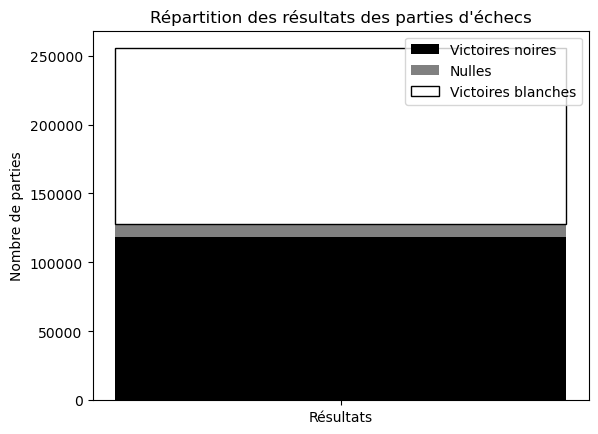

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Chemin vers le fichier CSV
csv_file_path = "/home/onyxia/work/data/Data_uncleaned.csv"  # Remplacez par le chemin réel de votre fichier

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv(csv_file_path)

# Définir les résultats valides
valid_results = {"1-0", "0-1", "1/2-1/2"}

# Nettoyer les colonnes si nécessaire
df.columns = df.columns.str.strip()

# Vérifier que la colonne des résultats existe
result_column = "Result"  # Remplacez par le nom exact de la colonne
if result_column not in df.columns:
    raise ValueError(f"La colonne '{result_column}' est introuvable dans le fichier CSV.")

# Filtrer les résultats valides
df_valid = df[df[result_column].isin(valid_results)]

# Compter les occurrences des résultats valides
results_count = df_valid[result_column].value_counts()

# Extraire les données pour chaque type de résultat
black_wins = results_count.get("0-1", 0)
draws = results_count.get("1/2-1/2", 0)
white_wins = results_count.get("1-0", 0)

# Création d'une barre empilée
labels = ["Résultats"]  # Une seule barre pour représenter toutes les parties
bar_black = [black_wins]
bar_draws = [draws]
bar_white = [white_wins]

# Ajouter les barres empilées
plt.bar(labels, bar_black, color="black", label="Victoires noires")
plt.bar(labels, bar_draws, bottom=bar_black, color="gray", label="Nulles")
plt.bar(labels, bar_white, bottom=[b + d for b, d in zip(bar_black, bar_draws)], color="white", edgecolor="black", label="Victoires blanches")

# Ajouter des titres et une légende
plt.title("Répartition des résultats des parties d'échecs")
plt.ylabel("Nombre de parties")
plt.legend()
plt.savefig("graphiquebase.png")

/tmp/ipykernel_56843/242309141.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid["Tranche_Elo"] = pd.cut(df_valid["WhiteElo"], bins=bins, labels=labels, right=False)
/tmp/ipykernel_56843/242309141.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_valid.groupby("Tranche_Elo")["Result"].value_counts().unstack(fill_value=0)


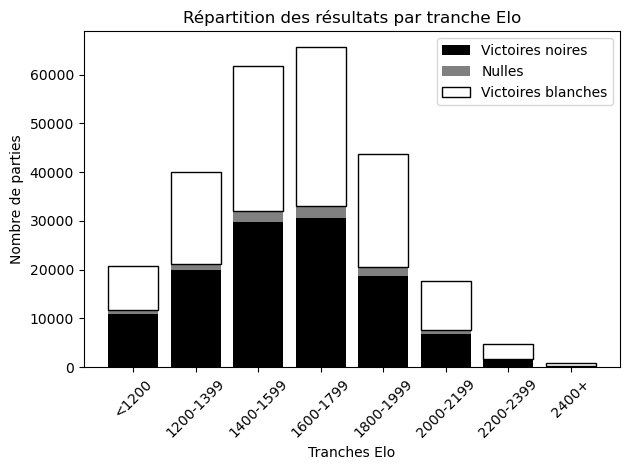

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Chemin vers le fichier CSV
csv_file_path = "/home/onyxia/work/data/Data_uncleaned.csv"  # Remplacez par le chemin réel de votre fichier

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv(csv_file_path)

# Vérifier que les colonnes nécessaires existent
required_columns = ["Result", "WhiteElo"]  # Remplacez "Elo" par le nom réel de la colonne des Elo
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"La colonne '{col}' est introuvable dans le fichier CSV.")

# Définir les résultats valides
valid_results = {"1-0", "0-1", "1/2-1/2"}

# Filtrer les résultats valides
df_valid = df[df["Result"].isin(valid_results)]

# Définir les tranches Elo
bins = [0, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 3000]
labels = ["<1200", "1200-1399", "1400-1599", "1600-1799", "1800-1999", "2000-2199", "2200-2399", "2400+"]
df_valid["Tranche_Elo"] = pd.cut(df_valid["WhiteElo"], bins=bins, labels=labels, right=False)

# Compter les occurrences des résultats pour chaque tranche Elo
grouped = df_valid.groupby("Tranche_Elo")["Result"].value_counts().unstack(fill_value=0)

# Extraire les données
black_wins = grouped.get("0-1", 0)
draws = grouped.get("1/2-1/2", 0)
white_wins = grouped.get("1-0", 0)

# Créer un graphique en barres empilées
x = labels  # Les tranches Elo
plt.bar(x, black_wins, color="black", label="Victoires noires")
plt.bar(x, draws, bottom=black_wins, color="gray", label="Nulles")
plt.bar(x, white_wins, bottom=black_wins + draws, color="white", edgecolor="black", label="Victoires blanches")

# Ajouter des titres et une légende
plt.title("Répartition des résultats par tranche Elo")
plt.xlabel("Tranches Elo")
plt.ylabel("Nombre de parties")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("graphiqueparelo.png")

/tmp/ipykernel_56843/106260328.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid["Tranche_Elo"] = pd.cut(df_valid["WhiteElo"], bins=bins, labels=labels, right=False)
/tmp/ipykernel_56843/106260328.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_valid.groupby("Tranche_Elo")["Result"].value_counts().unstack(fill_value=0)
/tmp/ipykernel_56843/106260328.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

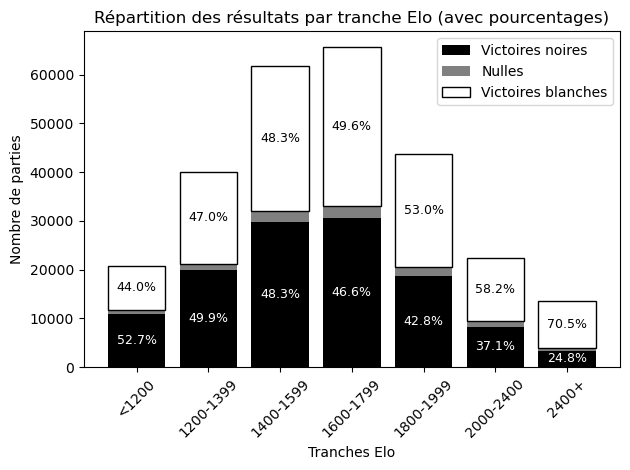

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Chemin vers le fichier CSV
csv_file_path = "/home/onyxia/work/data/Data_uncleaned.csv"  # Remplacez par le chemin réel de votre fichier

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv(csv_file_path)

# Vérifier que les colonnes nécessaires existent
required_columns = ["Result", "WhiteElo"]  # Assurez-vous que ces colonnes existent dans le fichier
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"La colonne '{col}' est introuvable dans le fichier CSV.")

# Définir les résultats valides
valid_results = {"1-0", "0-1", "1/2-1/2"}

# Filtrer les résultats valides
df_valid = df[df["Result"].isin(valid_results)]

# Définir les tranches Elo (avec 2000-2400 regroupés)
bins = [0, 1200, 1400, 1600, 1800, 2000, 2400, 3000]
labels = ["<1200", "1200-1399", "1400-1599", "1600-1799", "1800-1999", "2000-2400", "2400+"]
df_valid["Tranche_Elo"] = pd.cut(df_valid["WhiteElo"], bins=bins, labels=labels, right=False)

# Compter les occurrences des résultats pour chaque tranche Elo
grouped = df_valid.groupby("Tranche_Elo")["Result"].value_counts().unstack(fill_value=0)

# Extraire les données
black_wins = grouped.get("0-1", 0)
draws = grouped.get("1/2-1/2", 0)
white_wins = grouped.get("1-0", 0)

# Calculer le total pour chaque tranche pour le pourcentage
total_results = black_wins + draws + white_wins

# **Ajustement pour agrandir la barre `2400+`**
# On peut multiplier les résultats de la catégorie `2400+` par un facteur d'agrandissement pour rendre la barre plus visible
factor = 15  # Facteur pour augmenter la taille de la catégorie `2400+`
black_wins["2400+"] *= factor
draws["2400+"] *= factor
white_wins["2400+"] *= factor

# Recalculer le total après l'ajustement
total_results = black_wins + draws + white_wins

# Créer un graphique en barres empilées
x = labels  # Les tranches Elo
plt.bar(x, black_wins, color="black", label="Victoires noires")
plt.bar(x, draws, bottom=black_wins, color="gray", label="Nulles")
plt.bar(x, white_wins, bottom=black_wins + draws, color="white", edgecolor="black", label="Victoires blanches")

# Ajouter les pourcentages pour les victoires noires et blanches
for i, (bw, ww, total) in enumerate(zip(black_wins, white_wins, total_results)):
    if total > 0:
        plt.text(i, bw / 2, f"{bw / total * 100:.1f}%", color="white", ha="center", va="center", fontsize=9)
        plt.text(i, black_wins[i] + draws[i] + ww / 2, f"{ww / total * 100:.1f}%", color="black", ha="center", va="center", fontsize=9)

# Ajouter des titres et une légende
plt.title("Répartition des résultats par tranche Elo (avec pourcentages)")
plt.xlabel("Tranches Elo")
plt.ylabel("Nombre de parties")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("graphiqueparelo.png")

In [ ]:
import pandas as pd
csv_file_path = "/home/onyxia/work/data/Database_finale.csv"  # Remplacez par le chemin réel de votre fichier

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv(csv_file_path)
print(df.columns)
time_controls = df["TimeControl"].unique()

# Afficher les résultats
time_control_counts = df["TimeControl"].value_counts()

# Afficher les résultats
print("Types de TimeControl triés par nombre d'occurrences :")
print(time_control_counts)

In [4]:
import pandas as pd

# Charger le fichier CSV
csv_file_path = "/home/onyxia/work/data/Database_finale.csv"
df = pd.read_csv(csv_file_path)

# Compter le nombre de parties avec le code ECO C57
eco_c57_count = df[df['ECO'] == 'C57'].shape[0]

# Afficher le résultat
print(f"Le nombre de parties avec le code ECO C57 est : {eco_c57_count}")

Le nombre de parties avec le code ECO C57 est : 1725
